# Gerardo de Miguel González

**::GMG::** The aim of this notebook is to find a basic workflow for doing machine learning classification of an imbalanced dataset using best practices taken from other people's examples.

# Binary Classification Proof of Concept

## References

**::GMG::** These are the main references I've followed:

  - [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) Precision and Recall
  - [Classifier evaluation with imbalanced datasets](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) Introduction to the precision-recall plot.
  - [saito2015a](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432) Takaya Saito and Marc Rehmsmeier (2015) The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. PLoS One. 10(3):e011843.
  - [Acute Care Testing](https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used) Precision-recall curves – what are they and how are they used? by Suzanne Ekelund, 2017.
  - [Python Machine Learning](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) How and When to Use ROC Curves and Precision-Recall Curves for Classification in Python by Jason Brownlee on August 31, 2018.

`Brownlee (2018)` states clearly the evaluation curve I must use:

> When to Use ROC vs. Precision-Recall Curves?
>
>Generally, the use of ROC curves and precision-recall curves are as follows:
>
>  1. ROC curves should be used when there are roughly equal numbers of observations for each class.
>  2. Precision-Recall curves should be used when there is a moderate to large class imbalance.

that is fully supported by `Saito2015a` paper in PLoS One.

## Libraries

In [1]:
#::GMG::Basic Dataset Management: dataframes and ndarrays
import pandas as pd
import numpy as np

In [2]:
#::GMG::seaborn: statistical data visualization for a heatmap of pandas.corr()
#::NOTE::There's a lot of fuss for 'heatmapping' with matplotlib only
# https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#::GMG::Logistic Regression (aka logit) for classification
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

In [4]:
#::GMG::Split train and test
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [5]:
#::GMG::basic accuracy metric
# https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
from sklearn.metrics import accuracy_score

In [6]:
#::GMG::ROC/AUC
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
from sklearn.metrics import roc_curve, roc_auc_score 

In [7]:
#::GMG::etrics suited for imbalanced datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, balanced_accuracy_score

In [8]:
#::GMG::confusion matrix and one report for all metrics 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
#::GMG::For pre-processing not conmensurate features
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

## Dataset

**::GMG::** The dataset *was available* in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) but there's only [a text file](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/) with a notice at the moment what reads:

*Thank you for your interest in the Pima Indians Diabetes dataset. 
The dataset is no longer available due to permission restrictions.*

**::GMG::** There are alternatives to downloading the csv formatted file though. I'm not sure whether those alternatives are going to keep being available in the near future. The first alternative that I've found out allows a direct download of a csv formated raw data, without any metadata (header):

  - [networkrepository.com](http://networkrepository.com/pima-indians-diabetes.php)
  
However you can read metadata info and citation policy in the web page. The website also provides tools for interactive exploration of data. You can visualize and interactively explore pima-indians-diabetes and its important statistics.

```BibText
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}
```

**::NOTE::** I don't know how to deal with [Bibtext](https://en.wikipedia.org/wiki/BibTeX) bibliographic entries in Notebooks yet.

**::GMG::** You may also [download the data from kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1) in zipped csv format (which *includes a header* with the column names by the way) using [the reference provided](https://www.kaggle.com/uciml/pima-indians-diabetes-database) in the Datacamp article *if you have an account in kaggle*. I haven't checked it but you should be able [to use the kaggle API](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0) to automate the download from code *with an API key* created with your account. 

**::GMG::** Scikit learn has a [module for reference datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in its API. Some of the API calls let you *fetch datasets* from platforms like [openml](https://www.openml.org/), i.e [`sklearn.datasets.fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html). You only need  to know the [openml reference ID](https://www.openml.org/d/37) for the database in openml.

**::GMG::** I've already downloaded the csv dataset *manually from kaggle* (with my account  and placed it in a data folder.

In [10]:
!ls data

pima-indians-diabetes.csv


In [11]:
#::GMG::Dataframe from csv file
data = pd.read_csv("data/pima-indians-diabetes.csv")

In [12]:
#::GMG::Check the first samples
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#::GMG::Check the last samples
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**::GMG::** There are 8 different integer and real features and the categorical (binary) *Outcome* (i.e. classification) where 1 stands for having diabetes, and 0 denotes not havving diabetes

In [14]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 9)


## Exploratory Data Analysis

**::GMG::** The goal of this stage of our study is to get to know the data, their flaws and perhaps some clues to improve them.

### stats

In [15]:
#::GMG::See what data types have features and target ('Outcome')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**::GMG::** Here I *notice* that the features are not commensurate with each other. That means some features may need (or may not) some sort of scaling or normalization depending on the [assumptions of the classificatiom method](https://www.statisticssolutions.com/assumptions-of-logistic-regression/) to be used. 

**::NOTE::** It would be useful to take a look at the wisdom of *stackexchange crossvalidated* about this: [Is standardization needed before fitting logistic regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)

and also read what [Sebastian Raschka](https://sebastianraschka.com/about.html), a machine learning researcher, [has to say](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#evaluating-the-classification-accuracy-with-and-without-standardization).

**::GMG::** I *also notice* there are zeros in features that *don't allow such a value*, for example `BlodPressure`, `BMI` or `SkinThickness`. These are flaws or *ouliers* and should be fixed. This is not always easy or strightforward and may require deep domain knowledge.

In [16]:
#::GMG::Statistics of features and target 
# ::NOTE::Glucose, BloodPressure, SkinThickness, Insulin and BMI 
#       have ZEROS (min statistic) in their values ... 
#
#::NOTE::The features are not commensurate, I mean, some of them need scaling/normalization/standarization
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**::GMG::** Visualising the relationship among features is a frist step to assess the redundance between subsets of them. The most basic check may be done between pairs of features.

**::NOTE::** I've read:

>  ... logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
>
> [Statistics Solutions](https://www.statisticssolutions.com/assumptions-of-logistic-regression/)

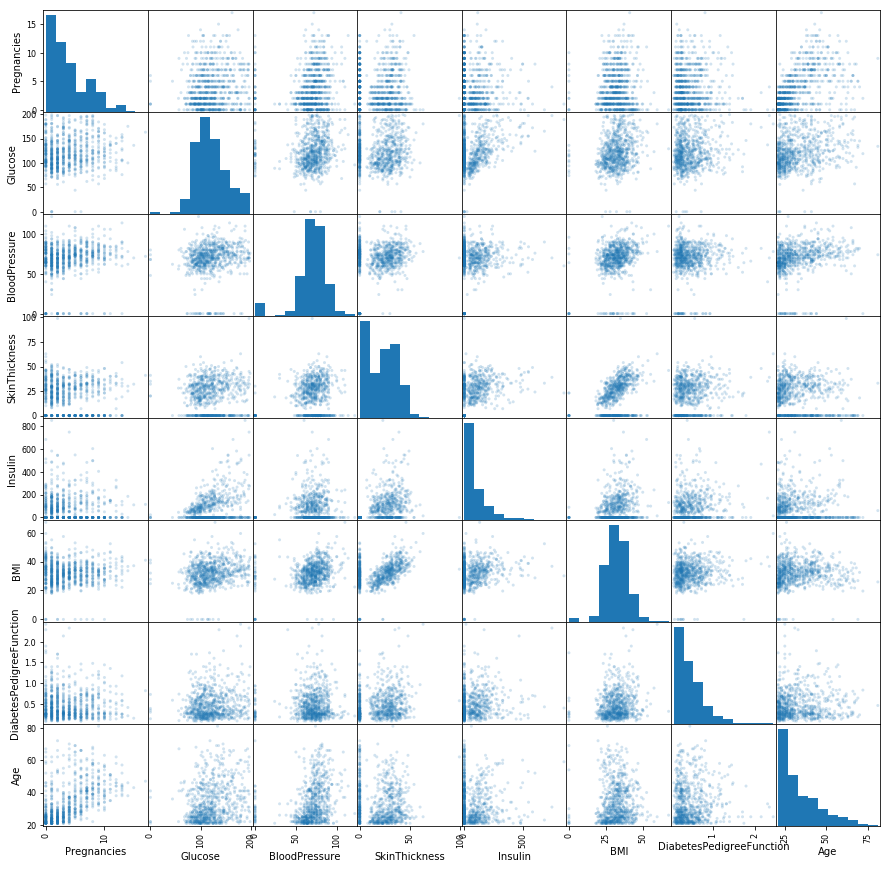

In [17]:
#::GMG::pandas scatterplot matrix
# https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781784390150/4/ch04lvl1sec37/a-scatter-plot-matrix
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools
spm = pd.plotting.scatter_matrix(
        data.iloc[:,:data.shape[1] - 1], figsize=(15, 15), alpha=0.2, diagonal='hist'
)

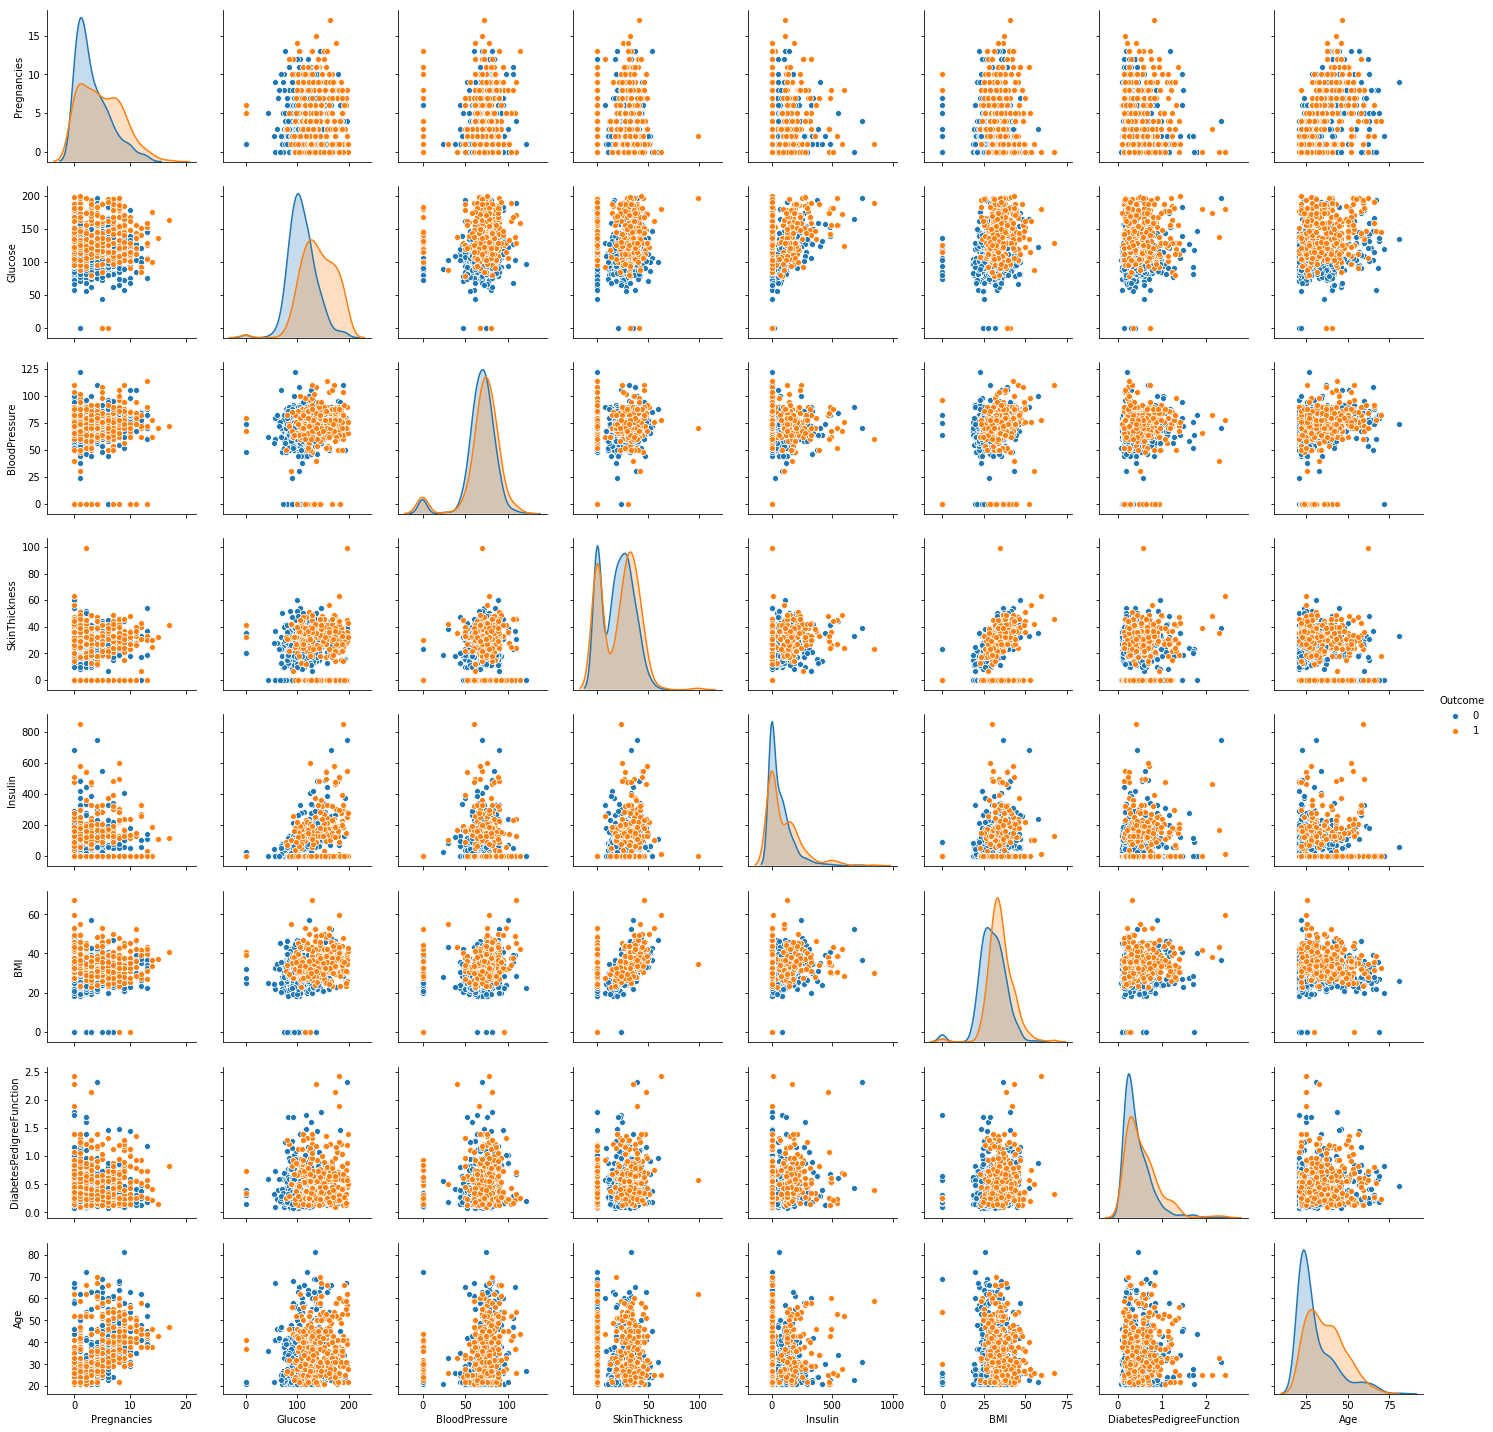

In [18]:
#::GMG::Seaborn's pairplot looks prettier
# https://seaborn.pydata.org/examples/scatterplot_matrix.html
#sns.pairplot(data = data.iloc[:,:data.shape[1] - 1])
columns = list(data.columns.values)
features = [x for x in columns if x != 'Outcome']
sns.pairplot(data, hue='Outcome', 
             x_vars=features, y_vars=features, height=2.5)

**::GMG::** Quantification of the pair relationship can be visualized in a (pearson) correlation plot. Here I've included the `Outcome` (target) variable. The correlation between features and target may be roughly interpreted as an indicator of the importance of the feature individually. This *feature importance assessment* is somewhat simplistic though.

**::NOTE::** It seems there's a somewhat strong correlation between `Age` and `Pregnancies` (meaning redundace?) and between `Glucose` and `Outcome` (meaning importance?). On the other hand, there's almost no correlation between `SkinThickness` and `Outcome` nor between `BloodPressure` and `Outcome`. 

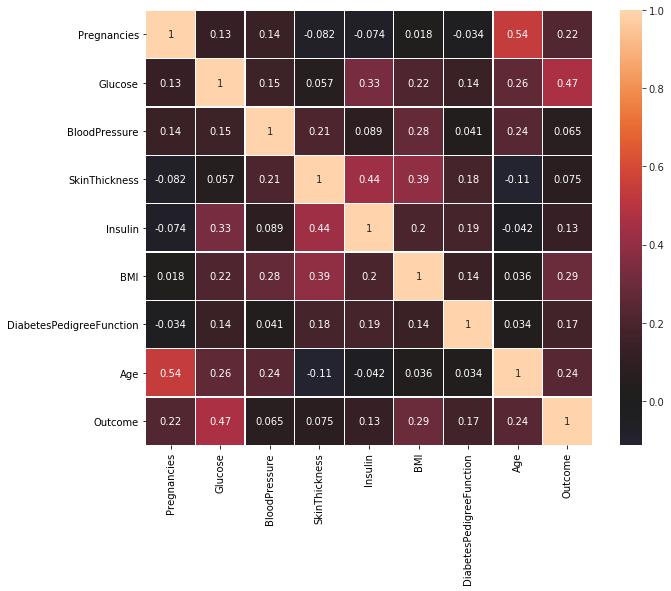

In [19]:
#::GMG::Not much insight from these corr() numbers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#::NOTE::DataFrame.corr(self, method='pearson', min_periods=1)
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
plt.subplots(figsize=(10,8))
color = sns.color_palette()
sns.set_style('darkgrid')
sns.heatmap(data.corr(), center=0, annot=True, linewidths=.3)

### special detailed visualizations

**::GMG::** Visualization can be extended in detail to features by `Outcome` (pandas *density plots*) and pairs of features by `Outcome` (*seaborn FacetGrids*). These sort of plots can be used to do **feature engineering**, i.e. adding *new features* to improve the dataset, based on interesting regions (feature intervals or values) identified (see [Kaggle example](https://www.kaggle.com/lejustin/feature-engineering-metric-comparison) by Justin Le). I'm not going to do feature engineering here.

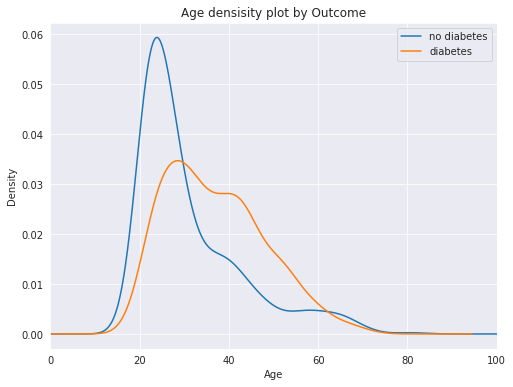

In [20]:
#::GMG::I can also see density plots of individual features by Outcome
# https://stackoverflow.com/questions/28293028/plotting-grouped-data-in-same-plot-using-pandas
# https://stackoverflow.com/questions/43463438/how-to-plot-multiple-density-plots-on-the-same-figure-in-python/43463947
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Age densisity plot by Outcome')
ax.set_xlabel('Age')
ax.set_xlim(0, 100)
label = ['no diabetes', 'diabetes']
for i, df in data.groupby('Outcome'):
    df.Age.plot(kind="kde", ax=ax, label=label[i])
ax.legend()

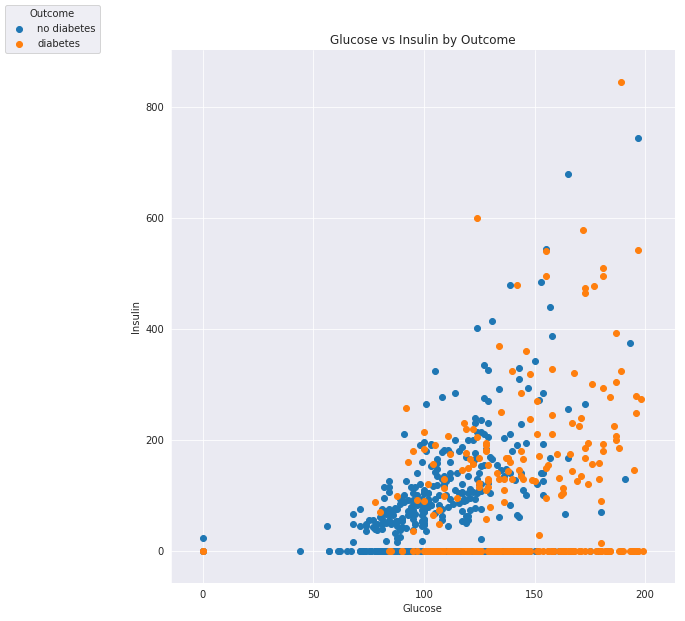

In [21]:
#::GMG::Seaborn has also FacetGrids
#       The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#::NOTE::I needed  to change fig size
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
# https://stackoverflow.com/questions/37815774/seaborn-pairplot-legend-how-to-control-position
grid = sns.FacetGrid(data, hue = 'Outcome')
grid.map(plt.scatter, 'Glucose', 'Insulin')
grid.axes.flatten()[0].set_title('Glucose vs Insulin by Outcome')
grid.fig.legend(title='Outcome', 
                handles=grid._legend_data.values(), 
                #labels= grid._legend_data.keys(), 
                labels= ['no diabetes', 'diabetes'],
                loc='upper left', 
                ncol=1)
grid.fig.set_size_inches(10,10)

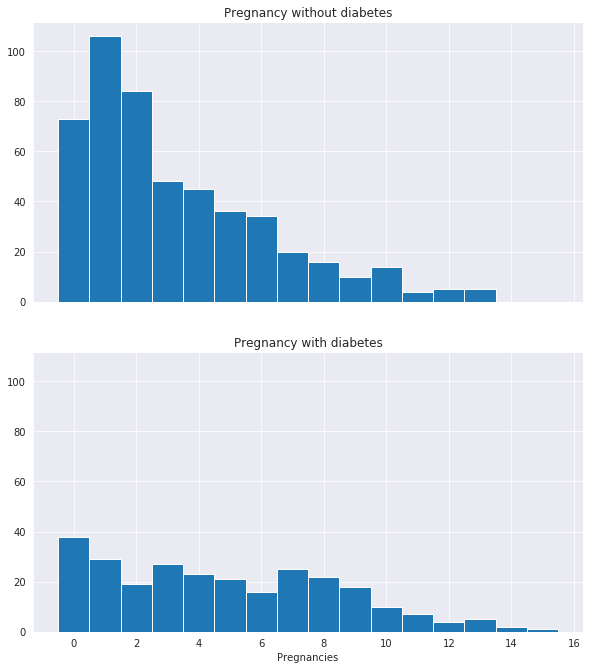

In [22]:
#::GMG::For features with discrete values, histogram seem to be more appropriate
n_bins = data.Pregnancies.max() - data.Pregnancies.min()
grid = sns.FacetGrid(data, row='Outcome')
grid.map(plt.hist, 'Pregnancies', bins=np.arange(0, n_bins)-0.5)
grid.axes.flatten()[0].set_title('Pregnancy without diabetes')
grid.axes.flatten()[1].set_title('Pregnancy with diabetes')
grid.fig.set_size_inches(10,10)

### imbalance

**::GMG::** Finally I think It's worth noting that there is **imbalance** in the dataset. It's not an extreme imbalance but I'll take it into account in train/test splitting and the choice of metrics for method evaluation.

In [23]:
#::GMG::Beware of the imbalance dataset ...
#       https://www.quora.com/What-is-an-imbalanced-dataset
#       https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
#       https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
#       How do I check?
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0, 0.5, 'Frequency %')

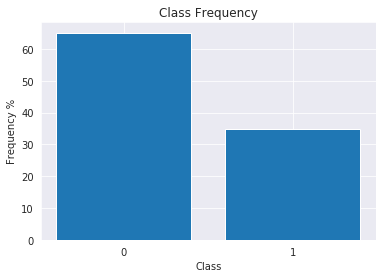

In [24]:
#::GMG::Say, 0 healthy, 1 diabetes
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.chararray.astype.html
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
classes = data.Outcome.values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique.astype(np.character),100*counts/classes.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

### outliers

**::GMG::** The dataset is known to have *outliers*. Specifically, there are *missing observations* for some columns that are marked as a zero value. A zero value is invalid for `BloodPressure`, `SkinThickness`, `Glucose` and `BMI`. It's less obvious for `Insulin`.

In [25]:
#::GMG::Unexpected outliers, as I've just said from data.describe() ...
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       which have zeros (min) in their values
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
print("Zero Plasma Glucose  Total: ", data[data.Glucose == 0].shape[0])
print("Zero Insulin level   Total: ", data[data.Insulin == 0].shape[0])
print("Zero Blood Pressure  Total: ", data[data.BloodPressure == 0].shape[0])
print("Zero Skin Thickness  Total: ", data[data.SkinThickness == 0].shape[0])
print("Zero Body Mass Index Total: ", data[data.BMI == 0].shape[0])

Zero Plasma Glucose  Total:  5
Zero Insulin level   Total:  374
Zero Blood Pressure  Total:  35
Zero Skin Thickness  Total:  227
Zero Body Mass Index Total:  11


In [26]:
#::GMG::How do the outiliers split by Outcome?
#       Insuline level case
print('Zero Insulin levels in non-diabetics: {}, diabetics: {}'.format(
                data[(data.Insulin == 0) & (data.Outcome == 0)].shape[0], 
                data[(data.Insulin == 0) & (data.Outcome == 1)].shape[0]
         )
     )

Zero Insulin levels in non-diabetics: 236, diabetics: 138


In [27]:
#::GMG::How do the outiliers split by Outcome?
#       SkinTickness case
print('Zero SkinThickness in non-diabetics: {}, diabetics: {}'.format(
                data[(data.SkinThickness == 0) & (data.Outcome == 0)].shape[0], 
                data[(data.SkinThickness == 0) & (data.Outcome == 1)].shape[0]
         )
     )

Zero SkinThickness in non-diabetics: 139, diabetics: 88


## Train/Test Split

**::GMG::** Before pre-processing, I isolate training and testing sets to avoid *Data Snooping*. This important trap is quoted by Justin Le in his [kaggel kernel](https://www.kaggle.com/lejustin/feature-engineering-metric-comparison) *Feature Engineering & Metric Comparison* (Python notebook using data from Pima Indians Diabetes Database) that I mentioned before, who in turn also quotes a famous machine learning master class by **Dr. Yaser Abu-Mostafa**, Caltech:

  - [Lecture 17](http://www.teachingtree.co/watch/data-snooping) - Three Learning Principles  
  
that I vividly recommend watching.

In [28]:
#::GMG::70/30 split with stratify to keep the percentage of classes
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#::NOTE::Best practice in imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(
            data.loc[:, 'Pregnancies':'Age'], data.loc[:,'Outcome'],
            test_size = 0.3, 
            random_state = 1, 
            stratify = data['Outcome']
)

In [29]:
X_train.shape

(537, 8)

In [30]:
y_train.shape

(537,)

In [31]:
X_test.shape

(231, 8)

In [32]:
y_test.shape

(231,)

In [33]:
#::GMG::There's an altenative using the Dataframe without features/target spllit
#::NOTE::Then I must do the features/target split later, of course :)
train, test = train_test_split(
            data, 
            test_size = 0.3, 
            random_state = 1, 
            stratify = data['Outcome']
)

In [34]:
train.shape

(537, 9)

In [35]:
test.shape

(231, 9)

Text(0, 0.5, 'Frequency %')

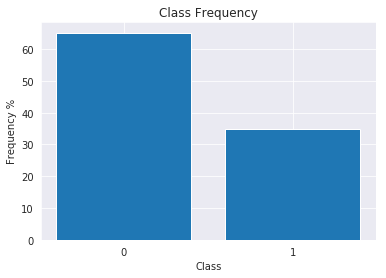

In [36]:
#::GMG::Keep the imbalance in the splits
classes_train = train.Outcome.values
unique, counts = np.unique(classes_train, return_counts = True)
plt.bar(unique.astype(np.character),100*counts/classes_train.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

Text(0, 0.5, 'Frequency %')

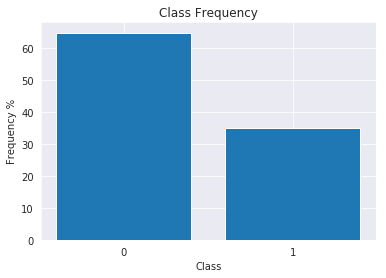

In [37]:
#::GMG::A little more imabalanced in test dataset (should I care?)
classes_test = test.Outcome.values
unique, counts = np.unique(classes_test, return_counts = True)
plt.bar(unique.astype(np.character),100*counts/classes_test.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

## Interlude

In [38]:
#::GMG::Trying to list all objects used at the moment
# https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-who
%whos

Variable                  Type             Data/Info
----------------------------------------------------
LogisticRegression        type             <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MaxAbsScaler              type             <class 'sklearn.preprocessing.data.MaxAbsScaler'>
MinMaxScaler              type             <class 'sklearn.preprocessing.data.MinMaxScaler'>
StandardScaler            type             <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X_test                    DataFrame             Pregnancies  Glucose<...>n\n[231 rows x 8 columns]
X_train                   DataFrame             Pregnancies  Glucose<...>n\n[537 rows x 8 columns]
accuracy_score            function         <function accuracy_score at 0x7f20f8f9a510>
auc                       function         <function auc at 0x7f20f9217bf8>
average_precision_score   function         <function average_precisi<...>_score at 0x7f20f9217d90>
ax                        AxesSubplot      AxesSub

In [39]:
#::GMG::Less informative alternative to get all objects
[s for s in dir() if not s.startswith('_')]

['In',
 'LogisticRegression',
 'MaxAbsScaler',
 'MinMaxScaler',
 'Out',
 'StandardScaler',
 'X_test',
 'X_train',
 'accuracy_score',
 'auc',
 'average_precision_score',
 'ax',
 'balanced_accuracy_score',
 'classes',
 'classes_test',
 'classes_train',
 'classification_report',
 'color',
 'columns',
 'confusion_matrix',
 'counts',
 'data',
 'df',
 'exit',
 'f1_score',
 'features',
 'fig',
 'get_ipython',
 'grid',
 'i',
 'label',
 'n_bins',
 'np',
 'pd',
 'plt',
 'precision_recall_curve',
 'precision_score',
 'quit',
 'recall_score',
 'roc_auc_score',
 'roc_curve',
 'sns',
 'spm',
 'test',
 'train',
 'train_test_split',
 'unique',
 'y_test',
 'y_train']

## Pre-processing

**::GMG::** Here I'm going to do [some transformations to the features](https://scikit-learn.org/stable/modules/preprocessing.html) in order to fix things like outliers and variability. The transformations I'm going to apply are *scaling* and *imputation*. Those transformations may be applied separately or in combination. First I'm going to apply them separately to one model (*Logistic Regression*) and then, when I learn how to do it (pipelines and whatnot), in combination (probably with several models or along with model hyperparameter tuning) with best practice cross validation to avoid *data snooping*. 

### wrong

**::GMG::** I had to make this section as a future warning. My first iteration on pre-processing was to remove the outliers in `Glucose`, `BloodPressue` and `BMI` because it affected just a few samples. And to drop the `SkinTickness` feature alltogether on the grounds of (the naïve assumption of) its no correlation to `Outcome`, the aforementioned correlation computed *after* first outlier removals. All this done *before* isolating a train and test sets from the main dataset. This approach I think is *flawed* at many levels. The main thing is the *data snooping* effected. 

In [40]:
#::GMG::Hard choice to make ... remove the rows where the “BloodPressure”, 
#       “BMI” and “Glucose” are zero (small number of rows, low impact)
#::NOTE::Should I make a copy instead of a subselect view?
# https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas
data_mod = data[(data.BloodPressure != 0) & 
                (data.BMI != 0) & 
                (data.Glucose != 0)
               ]

In [41]:
print(data_mod.shape)

(724, 9)


In [42]:
#::GMG::Some basic (Pearson) correlations with Outcome
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation_matrix = data_mod.corr()
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.488384
BMI                         0.299375
Age                         0.245741
Pregnancies                 0.224417
DiabetesPedigreeFunction    0.184947
BloodPressure               0.166703
Insulin                     0.145488
SkinThickness               0.092030
Name: Outcome, dtype: float64

**::GMG::** Based on this basic analysis I might avoid using `Skin Thickness` but not `Insulin` .

In [43]:
#::GMG::I make a bold choice ...
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
data_final = data_mod.drop(columns = ['SkinThickness'])
print(data_final.shape)

(724, 8)


### scaling

**::GMG::** I wonder whether the fearures of tha dataset really need scaling. And what's scaling to that. [Scale, Normalize or Standardize](https://stats.stackexchange.com/questions/70553/what-does-normalization-mean-and-how-to-verify-that-a-sample-or-a-distribution/70555#70555)? To understand the need of scaling I've already quoted a reference from *StackExchange Crossvalidated*: [Is standardization needed before fitting logistic regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)
/whats-the-difference-between-normalization-and-standardization/10291#10291)

> Standardization isn't required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization. For example, if you use Newton-Raphson to maximize the likelihood, standardizing the features makes the convergence faster. Otherwise, you can run your logistic regression without any standardization treatment on the features.

I've also read what [Sebastian Raschka](https://sebastianraschka.com/about.html), a machine learning researcher, [has to say](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#evaluating-the-classification-accuracy-with-and-without-standardization):

> Some examples of algorithms where feature scaling matters are: logistic regression, [...] if you are using gradient descent/ascent-based optimization.
>
> [...]
>
> In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to [0, 1] range) our data. Some algorithms assume that our data is centered at 0. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to 0 or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

The different scaling techniques meanings and usage can be seen in the following references I've collected:

  - [Medium](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e) Why, How and When to Scale your Features by Sudharsan Asaithambi, Dec 4, 2017
  - [Medium](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc) Standardize or Normalize? — Examples in Python by Robert R.F. DeFilippi, Apr 29, 2018 
  - [Towards Data Science](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) Scale, Standardize, or Normalize with Scikit-Learn. When to use MinMaxScaler, RobustScaler, StandardScaler, and Normalizer by Jeff Hale, Mar 4 2019
  - [Towards Data Science](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf) Normalization vs Standardization — Quantitative analysis. Stop using StandardScaler from Sklearn as a default feature scaling method can get you a boost of 7% in accuracy, even when you hyperparameters are tuned! by Shay Geller, Apr 4 2019 

**::GMG::** So I'm going to try with *and* without scaling.

In [51]:
#::GMG::Select the features that are not counts or the special PedigreeFunction
features_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [59]:
#::GMG::I make a (deep?) copy in order to isolate transformations and use them later in models
# https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas
X_train_norm = X_train.copy()
X_train_std = X_train.copy()
X_test_norm = X_test.copy()
X_test_std = X_test.copy()

In [52]:
#::GMG::I build the transformers to apply to train and test
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
minmax_scaler =  MinMaxScaler().fit(X_train[features_to_scale])
std_scaler = StandardScaler().fit(X_train[features_to_scale])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [60]:
#::GMG::Transformer I
minmax_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [61]:
#::GMG::Transformer II
std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
#::GMG::Best practice applying the scale to train, then test
X_train_norm[features_to_scale] = minmax_scaler.transform(X_train[features_to_scale])
X_test_norm[features_to_scale] = minmax_scaler.transform(X_test[features_to_scale])
X_train_std[features_to_scale] = std_scaler.transform(X_train[features_to_scale])
X_test_std[features_to_scale] = std_scaler.transform(X_test[features_to_scale])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [63]:
X_train_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.836127,0.613265,0.626308,0.207983,0.133939,0.539163,0.481223,33.266294
std,3.380028,0.162441,0.167796,0.161261,0.180438,0.126517,0.337300,11.779609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,0.500000,0.563636,0.000000,0.000000,0.459596,0.253000,24.000000
50%,3.000000,0.595960,0.636364,0.232323,0.073333,0.538721,0.378000,30.000000
75%,6.000000,0.712121,0.727273,0.323232,0.216667,0.612795,0.647000,41.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.420000,81.000000


In [64]:
X_test_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,3.865801,0.604333,0.632704,0.206174,0.130815,0.537278,0.450147,33.181818
std,3.352377,0.159390,0.193934,0.161179,0.217133,0.146440,0.316660,11.740373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,0.500000,0.581818,0.000000,0.000000,0.462963,0.228500,24.000000
50%,3.000000,0.575758,0.654545,0.232323,0.000000,0.538721,0.364000,28.000000
75%,6.000000,0.689394,0.727273,0.323232,0.192500,0.619529,0.584500,40.000000
max,13.000000,1.005051,1.109091,0.606061,1.410000,1.129630,2.329000,72.000000


In [65]:
X_train_std.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.000000,537.000000
mean,3.836127,8.600610e-17,3.440244e-16,-7.939025e-17,-2.977134e-17,-1.984756e-17,0.481223,33.266294
std,3.380028,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.337300,11.779609
min,0.000000,-3.778820e+00,-3.736039e+00,-1.290930e+00,-7.429897e-01,-4.265542e+00,0.084000,21.000000
25%,1.000000,-6.979162e-01,-3.738462e-01,-1.290930e+00,-7.429897e-01,-6.294850e-01,0.253000,24.000000
50%,3.000000,-1.066317e-01,5.998505e-02,1.510775e-01,-3.361918e-01,-3.497139e-03,0.378000,30.000000
75%,6.000000,6.091337e-01,6.022741e-01,7.153414e-01,4.589130e-01,5.825340e-01,0.647000,41.000000
max,17.000000,2.382987e+00,2.229141e+00,4.915973e+00,4.804253e+00,3.645879e+00,2.420000,81.000000


In [66]:
X_test_std.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,3.865801,-0.055034,0.038153,-0.011226,-0.017325,-0.014913,0.450147,33.181818
std,3.352377,0.982129,1.156850,1.000423,1.204489,1.158550,0.316660,11.740373
min,0.000000,-3.778820,-3.736039,-1.290930,-0.742990,-4.265542,0.078000,21.000000
25%,1.000000,-0.697916,-0.265388,-1.290930,-0.742990,-0.602847,0.228500,24.000000
50%,3.000000,-0.231113,0.168443,0.151077,-0.742990,-0.003497,0.364000,28.000000
75%,6.000000,0.469093,0.602274,0.715341,0.324855,0.635810,0.584500,40.000000
max,13.000000,2.414107,2.879888,2.470829,7.078623,4.671433,2.329000,72.000000


**::NOTE::** I understand that to avoid *data snooping* I must apply the transformers the way I've done.

In [68]:
#::GMG::The base sets to work with the models :)
# https://www.programiz.com/python-programming/methods/string/startswith
[s for s in dir() if 
     not s.startswith('_') 
     and s.startswith(('X_','y_'))
]

['X_test',
 'X_test_norm',
 'X_test_std',
 'X_train',
 'X_train_norm',
 'X_train_std',
 'y_test',
 'y_train']

In [69]:
#::GMG::The transformers at the moment
# https://www.programiz.com/python-programming/methods/string/endswith
[s for s in dir() if 
     not s.startswith('_') 
     and s.endswith('scaler')
]

['minmax_scaler', 'std_scaler']

### imputation

**::GMG::** I may just *remove* the samples with the ouliers alltogether. The problem with features like `Insulin` and `SkinThickness` is that they are *a significant part* of the dataset. They cannot be removed. I may use [an imputation method](https://scikit-learn.org/stable/modules/impute.html#imputation-of-missing-values) to replace the zeros, say filling in *average/mean values*, but in this case putting a mean value to `BloodPressure` would [send a wrong signal](http://www.bloodpressureuk.org/BloodPressureandyou/Yourbody/Diabetes) to the model.

**::GMG::** Some imputations require domain knowledge I don't have. For example, the `Insulin` feature. I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about the zero Insulin issue. It [turns out](https://www.yourhormones.info/hormones/insulin/) that ...

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

and [also](https://www.medicalnewstoday.com/articles/267241.php):

> Type 1 diabetes was previously thought to render the pancreas completely unable to produce insulin, the hormone responsible for controlling sugar entry into cells and subsequent blood levels.
>
>The truth, researchers have now discovered, is that very small amounts of insulin are produced in "most" patients, and that levels in the blood even respond to food intake.
>

**::GMG::** Related to low `Glucose` level (*Hypoglycemia*):

> Hypoglycemia is a condition caused by a very low level of blood sugar (glucose), your body's main energy source. Hypoglycemia is often related to the treatment of diabetes. However, a variety of conditions — many rare — can cause low blood sugar in people without diabetes.Sep 7, 2018
>
> [Hypoglycemia - Symptoms and causes - Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/hypoglycemia/symptoms-causes/syc-20373685)

**::GMG::** About diabetes and high `BloodPressure`:

> About 25% of people with Type 1 diabetes and 80% of people with Type 2 diabetes have high blood pressure.
>
> [Blood Pressure UK](http://www.bloodpressureuk.org/BloodPressureandyou/Yourbody/Diabetes)

**::GMG::** So what I am going to do? I don't have domain knowledge. So I'm going to *remove the outliers* that expand into the fewer samples, i.e. `Glucose`, `BloodPressue` and `BMI` and then I'm going to *impute* `SkinThickness` with a *constant* strategy, computing the `fill_value` with *Gaussian randomness*, that is, generating the fill value from a distribution with the mean and standard deviation of the feature, as done in Justin Le [kaggle kernel](https://www.kaggle.com/lejustin/feature-engineering-metric-comparison). Finally I'm going to leave `Insulin` unchanged.

**::NOTE::** I may use the [`sklearn.impute`](https://scikit-learn.org/0.20/modules/classes.html#module-sklearn.impute) transformer [`SimpleImputer`](https://scikit-learn.org/0.20/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) instead of [`Pandas.DataFrame.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). If I decide to use [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html), that is. Using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is the way to go, the best practice.

## Logit Classifier

### model

In [28]:
#::GMG::I must tell the solver I want, otherwise it yields:
#
#        'FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. 
#         Specify a solver to silence this warning. FutureWarning)'
#
# when doing model.fit()
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# 'For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster 
#  for large ones.'
lr = LogisticRegression(solver = 'liblinear', random_state = 1)

### fit and predict

In [36]:
#::GMG::Split features/target in train and test
train_features = train.iloc[:,:train.shape[1] - 1]
train_target = train['Outcome']

In [37]:
train_features.shape

(506, 7)

In [38]:
train_target.shape

(506,)

In [39]:
test_features = test.iloc[:,:test.shape[1] - 1]
test_target = test['Outcome']

In [40]:
test_features.shape

(218, 7)

In [41]:
test_target.shape

(218,)

In [42]:
#::GMG::Train the model, default parameters except solver to avoid warning ;)
lr.fit(X = train_features, y = train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
#::GMG::Let's see the training accuracy. I've done some formatting
# https://pyformat.info/#number
# https://www.python-course.eu/python3_formatted_output.php
print('{:4.3f}'.format(
    lr.score(X = train_features, y = train_target)))

0.767


In [44]:
#::GMG::Now it's time to predict
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
pred = lr.predict(X = test_features)

In [45]:
print('{:4.3f}'.format(
    lr.score(X = test_features, y = test_target)))

0.780


### evaluation

In [46]:
#::GMG::Let's see the test accuracy (same as lr.score)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
#::GMG::I may use the lr model object to get the same score (accuracy)
#print('{:4.3f}'.format(
#    lr.score(X = test_features, y = test_target)))
print('Accuracy: {:4.3f}'.format(accuracy_score(test_target, pred)))

Accuracy: 0.780


In [47]:
#::GMG::Now sensitivity (aka recall) and specificity (biomed context like this one)
#       from the confusion matrix
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
cm = confusion_matrix(y_true = test_target, y_pred = pred)
tn, fp, fn, tp = cm.ravel()
print(cm)

[[127  12]
 [ 36  43]]


In [48]:
tn, fp, fn, tp

(127, 12, 36, 43)

In [49]:
#::GMG::Specificity measures the proportion of actual negatives that are correctly identified 
#       as such (e.g., the percentage of healthy people who are correctly identified 
#       as not having the condition)
specificity = tn / (tn + fp)
#::GMG::The Sensitivity/Recall is intuitively the ability of the classifier to find all 
#       the positive samples (diabetes), e.g. the percentage of sick people who are correctly 
#       identified as having the condition
sensitivity = tp / (tp + fn)
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
print('Specificity: {:4.3f} \nSensitivity/Recall: {:4.3f}'.format(
    specificity, sensitivity
    )
)

Specificity: 0.914 
Sensitivity/Recall: 0.544


In [50]:
#::GMG::The precision is intuitively the ability of the classifier not to label as positive 
#       a sample that is negative.
#::GMG::The recall is intuitively the ability of the classifier to find all 
#       the positive samples (diabetes)
# https://en.wikipedia.org/wiki/Precision_and_recall
# https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures
print('Precision: {:4.3f} \nRecall: {:4.3f}'.format(
    precision_score(y_true = test_target, y_pred = pred),
    recall_score(y_true = test_target, y_pred = pred)
    )
)

Precision: 0.782 
Recall: 0.544


In [51]:
#::GMG::F1 score of the positive (diabetes) class
# F1 = 2 * (precision * recall) / (precision + recall)
# https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
print('f_1 score (diabetes): {:4.3f} \nf_1 score (healthy): {:4.3f}'.format(
    f1_score(average = 'binary', pos_label = 1,
             y_true = test_target, y_pred = pred),
    f1_score(average = 'binary', pos_label = 0,
             y_true = test_target, y_pred = pred)
    )
)

f_1 score (diabetes): 0.642 
f_1 score (healthy): 0.841


In [53]:
#::GMG:: It is the macro-average of recall scores per class or, equivalently, 
#        raw accuracy where each sample is weighted according to the inverse prevalence 
#        of its true class. Thus for balanced datasets, the score is equal to accuracy.
print('Balanced Accuracy Score: {:4.3f}'.format(
    balanced_accuracy_score(y_true = test_target, y_pred = pred)))

Balanced Accuracy Score: 0.729


In [55]:
target_names = ['healthy', 'diabetes']
print(classification_report(y_true = test_target, y_pred = pred, 
                            target_names=target_names, digits = 3))

              precision    recall  f1-score   support

     healthy      0.779     0.914     0.841       139
    diabetes      0.782     0.544     0.642        79

   micro avg      0.780     0.780     0.780       218
   macro avg      0.780     0.729     0.741       218
weighted avg      0.780     0.780     0.769       218



In [59]:
#::GMG::AUC (imbalanced dataset -> average = 'weighted')
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# 'weighted': Calculate metrics for each label, and find their average, weighted by 
#             support (the number of true instances for each label)
probs = lr.predict_proba(X = test_features)
prob = probs[:, 1] 
auc = roc_auc_score(y_true = test_target, y_score = prob, average = 'weighted')
print('AUC diabetes: {:4.3f}'.format(auc))

AUC diabetes: 0.823


In [109]:
#::GMG::ROC
# https://stackabuse.com/understanding-roc-curves-with-python/
# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# https://stackoverflow.com/questions/2891790/how-to-pretty-print-a-numpy-array-without-scientific-notation-and-with-given-pre
fpr, tpr, thresholds = roc_curve(
    y_true = test_target, 
    y_score = prob, 
    pos_label = 1
)
print('fpr: {} \ntpr: {} \nthresholds: {}'.format(
    np.array_str(a = fpr, precision = 3), 
    np.array_str(a = tpr, precision = 3), 
    np.array_str(a = thresholds, precision = 3)
    )
)

fpr: [0.    0.007 0.007 0.014 0.014 0.022 0.022 0.029 0.029 0.036 0.036 0.043
 0.043 0.05  0.05  0.058 0.058 0.079 0.079 0.086 0.086 0.115 0.115 0.122
 0.122 0.151 0.151 0.165 0.165 0.173 0.173 0.18  0.18  0.245 0.245 0.259
 0.259 0.324 0.324 0.374 0.374 0.41  0.41  0.554 0.554 0.583 0.583 0.59
 0.59  0.633 0.633 0.662 0.662 0.676 0.676 0.712 0.712 0.791 0.791 1.   ] 
tpr: [0.    0.    0.076 0.076 0.152 0.152 0.177 0.177 0.316 0.316 0.38  0.38
 0.405 0.405 0.418 0.418 0.43  0.43  0.456 0.456 0.582 0.582 0.62  0.62
 0.658 0.658 0.709 0.709 0.734 0.734 0.747 0.747 0.759 0.759 0.772 0.772
 0.797 0.797 0.81  0.81  0.823 0.823 0.835 0.835 0.848 0.848 0.899 0.899
 0.924 0.924 0.937 0.937 0.949 0.949 0.975 0.975 0.987 0.987 1.    1.   ] 
thresholds: [1.952 0.952 0.862 0.85  0.768 0.758 0.753 0.752 0.657 0.648 0.612 0.612
 0.592 0.592 0.589 0.557 0.556 0.547 0.541 0.536 0.492 0.464 0.445 0.437
 0.428 0.403 0.384 0.359 0.346 0.345 0.343 0.333 0.331 0.3   0.296 0.294
 0.289 0.27  0.269 0.252 0.2

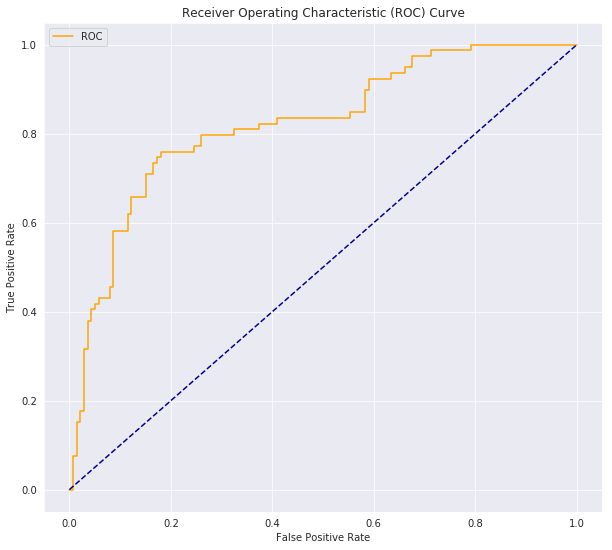

In [83]:
#::GMG::Plot ROC
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.figure(figsize = (10,9))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [89]:
#::GMG::Precision-Recall Curve and AUC, and average precision are better metrics 
#       with an imbalanced dataset
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
apc = average_precision_score(y_true = test_target, 
                              y_score = prob, 
                              pos_label = 1, 
                              average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc))

Average Precision Weighted: 0.717


In [96]:
#::GMG::Precision-Reacall Curve
precision, recall, thresholds_pr = precision_recall_curve(
    y_true = test_target, 
    probas_pred = prob, 
    pos_label = 1
)
print('precision: {} \nrecall: {} \nthresholds: {}'.format(
    np.array_str(a = precision, precision = 3), 
    np.array_str(a = recall, precision = 3), 
    np.array_str(a = thresholds_pr, precision = 3)
    )
)

precision: [0.418 0.415 0.417 0.419 0.422 0.424 0.426 0.429 0.431 0.433 0.436 0.438
 0.441 0.438 0.44  0.443 0.445 0.448 0.45  0.447 0.444 0.446 0.449 0.446
 0.448 0.451 0.454 0.457 0.453 0.456 0.459 0.462 0.465 0.468 0.471 0.468
 0.464 0.467 0.464 0.46  0.456 0.453 0.456 0.459 0.462 0.465 0.462 0.465
 0.468 0.471 0.475 0.478 0.482 0.485 0.489 0.493 0.496 0.5   0.504 0.508
 0.512 0.516 0.52  0.524 0.528 0.532 0.537 0.533 0.537 0.542 0.546 0.551
 0.556 0.552 0.557 0.561 0.566 0.571 0.577 0.582 0.587 0.583 0.589 0.594
 0.6   0.606 0.612 0.618 0.624 0.63  0.636 0.633 0.629 0.635 0.642 0.638
 0.645 0.652 0.659 0.667 0.674 0.682 0.69  0.698 0.706 0.702 0.711 0.707
 0.716 0.713 0.709 0.718 0.727 0.724 0.72  0.716 0.712 0.722 0.732 0.743
 0.754 0.75  0.746 0.742 0.754 0.75  0.746 0.742 0.754 0.767 0.78  0.793
 0.789 0.786 0.782 0.778 0.774 0.769 0.765 0.76  0.755 0.75  0.766 0.761
 0.756 0.773 0.791 0.81  0.805 0.825 0.821 0.842 0.838 0.833 0.857 0.853
 0.848 0.844 0.839 0.833 0.862 0.857 0.8

In [98]:
#::GMG::AUC (recall, precision)
auc_pr = auc(x = recall, y = precision)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr))

AUC Precision/Recall: 0.709


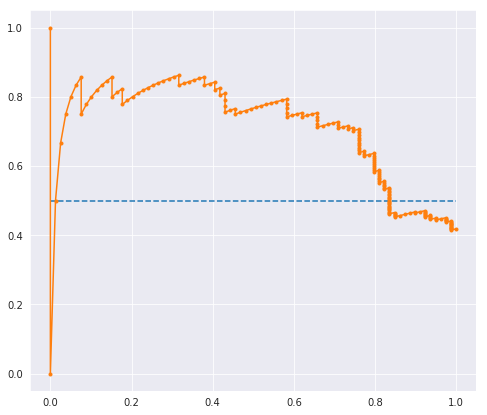

In [108]:
#::GMG::Plot Precision Recall Curve
#::NOTE::It's a bit strange curve with that zero glitch at the beginning!
plt.figure(figsize = (8,7))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

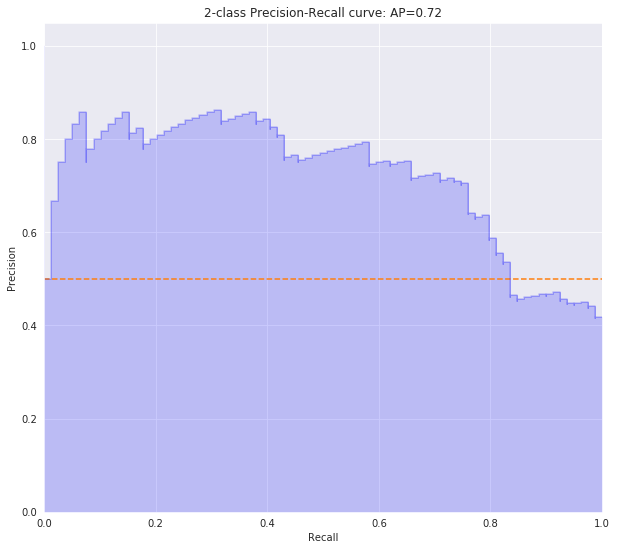

In [106]:
#::GMG::Alternatve plot from
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc))

### balanced model

In [70]:
#::GMG::class_weight : dict or ‘balanced’, optional (default=None)
#       The “balanced” mode uses the values of y to automatically adjust weights inversely 
#       proportional to class frequencies in the input data as 
#       n_samples / (n_classes * np.bincount(y))
#
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_bm = LogisticRegression(solver = 'liblinear', 
                           class_weight = 'balanced', 
                           random_state = 2)

### fit and predict

In [71]:
#::GMG::Train the model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
#
# sample_weight : array-like, shape (n_samples,) optional
lr_bm.fit(X = train_features, y = train_target)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [72]:
#::GMG::Now it's time to predict
pred_bm = lr_bm.predict(X = test_features)

In [73]:
#::GMG::Scores
print('Score Train: {:4.3f} \nScore Test: {:4.3f}'.format(
    lr_bm.score(X = train_features, y = train_target),
    lr_bm.score(X = test_features, y = test_target)
    )
)

Score Train: 0.761 
Score Test: 0.794


### evaluation

In [74]:
#::GMG::Report
print(classification_report(y_true = test_target, y_pred = pred_bm, 
                            target_names=target_names, digits = 3))

              precision    recall  f1-score   support

     healthy      0.846     0.827     0.836       139
    diabetes      0.707     0.734     0.720        79

   micro avg      0.794     0.794     0.794       218
   macro avg      0.776     0.781     0.778       218
weighted avg      0.795     0.794     0.794       218



In [75]:
#::GMG::Confusion Matrix
cm_bm = confusion_matrix(y_true = test_target, y_pred = pred_bm)
print(cm_bm)

[[115  24]
 [ 21  58]]


In [76]:
#::GMG::AUC
probs_bm = lr_bm.predict_proba(X = test_features)
prob_bm = probs_bm[:, 1] 
auc_bm = roc_auc_score(y_true = test_target, y_score = prob_bm, average = 'weighted')
print('AUC diabetes: {:4.3f} \nAUC Balanced Mode diabetes: {:4.3f}'.format(auc, auc_bm))

AUC diabetes: 0.823 
AUC Balanced Mode diabetes: 0.825


In [110]:
#::GMG::ROC curve
fpr_bm, tpr_bm, thresholds_bm = roc_curve(
    y_true = test_target, 
    y_score = prob_bm, 
    pos_label = 1
)
print('fpr: {} \ntpr: {} \nthresholds: {}'.format(
    np.array_str(a = fpr_bm, precision = 3), 
    np.array_str(a = tpr_bm, precision = 3), 
    np.array_str(a = thresholds_bm, precision = 3)
    )
)

fpr: [0.    0.007 0.007 0.014 0.014 0.022 0.022 0.029 0.029 0.036 0.036 0.05
 0.05  0.058 0.058 0.072 0.072 0.086 0.086 0.094 0.094 0.122 0.122 0.129
 0.129 0.137 0.137 0.144 0.144 0.151 0.151 0.158 0.158 0.173 0.173 0.259
 0.259 0.266 0.266 0.273 0.273 0.281 0.281 0.388 0.388 0.417 0.417 0.518
 0.518 0.525 0.525 0.547 0.547 0.561 0.561 0.583 0.583 0.59  0.59  0.633
 0.633 0.655 0.655 0.669 0.669 0.755 0.755 0.777 0.777 1.   ] 
tpr: [0.    0.    0.076 0.076 0.139 0.139 0.152 0.152 0.291 0.291 0.38  0.38
 0.418 0.418 0.43  0.43  0.443 0.443 0.582 0.582 0.595 0.595 0.646 0.646
 0.658 0.658 0.671 0.671 0.684 0.684 0.696 0.696 0.734 0.734 0.759 0.759
 0.772 0.772 0.785 0.785 0.797 0.797 0.81  0.81  0.823 0.823 0.835 0.835
 0.848 0.848 0.861 0.861 0.886 0.886 0.899 0.899 0.911 0.911 0.924 0.924
 0.937 0.937 0.962 0.962 0.975 0.975 0.987 0.987 1.    1.   ] 
thresholds: [1.977 0.977 0.93  0.924 0.887 0.878 0.877 0.864 0.801 0.799 0.766 0.754
 0.734 0.726 0.721 0.716 0.708 0.699 0.646 0.637 0.

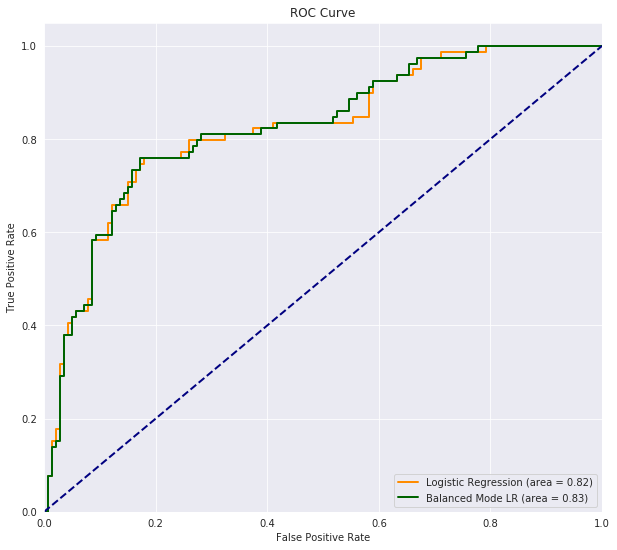

In [84]:
#::GMG::Plot ROC curve
plt.figure(figsize = (10,9))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot(fpr_bm, tpr_bm, color='darkgreen',
         lw=2, label='Balanced Mode LR (area = %0.2f)' % auc_bm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [111]:
#::GMG::average precision 
apc_bm = average_precision_score(y_true = test_target, 
                                 y_score = prob_bm, 
                                 pos_label = 1, 
                                 average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc_bm))

Average Precision Weighted: 0.716


In [112]:
#::GMG::Precision-Recall Curve
precision_bm, recall_bm, _ = precision_recall_curve(
    y_true = test_target, 
    probas_pred = prob_bm, 
    pos_label = 1
)

In [113]:
#::GMG::AUC (precision, recall)
auc_pr_bm = auc(x = recall_bm, y = precision_bm)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr_bm))

AUC Precision/Recall: 0.708


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

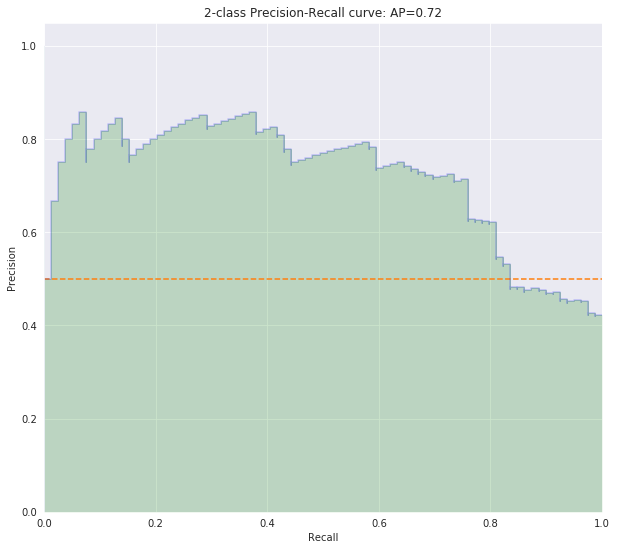

In [114]:
#::GMG::Plot Recall-Precision Curve
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall_bm, precision_bm, color='b', alpha=0.2, where='post')
plt.fill_between(recall_bm, precision_bm, alpha=0.2, color='g', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc_bm))